# **TSF Summer Internship**
# **Task - 2: Prediction Using Unsupervised ML**
**Aim:** From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

**Author:** Dhruv Shah

**Below shown image represents the kind of data contained by the given dataset.**

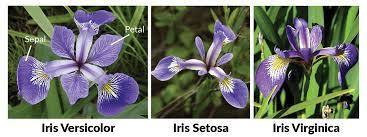

**Importing required Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import MeanShift

**Loading dataset from the local environment**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


**Loading and Reading the dataset**

In [4]:
df = pd.read_csv('Iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Visualizing the features of given dataset**

In [6]:
df.shape


(150, 6)

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**Validating the dataset**

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Droping ID column as it is not necessary**

In [9]:
df.drop('Id', axis = 'columns', inplace = True)

In [10]:
df.shape

(150, 5)

**Visualizing the dataset using pairplot with respect to species**

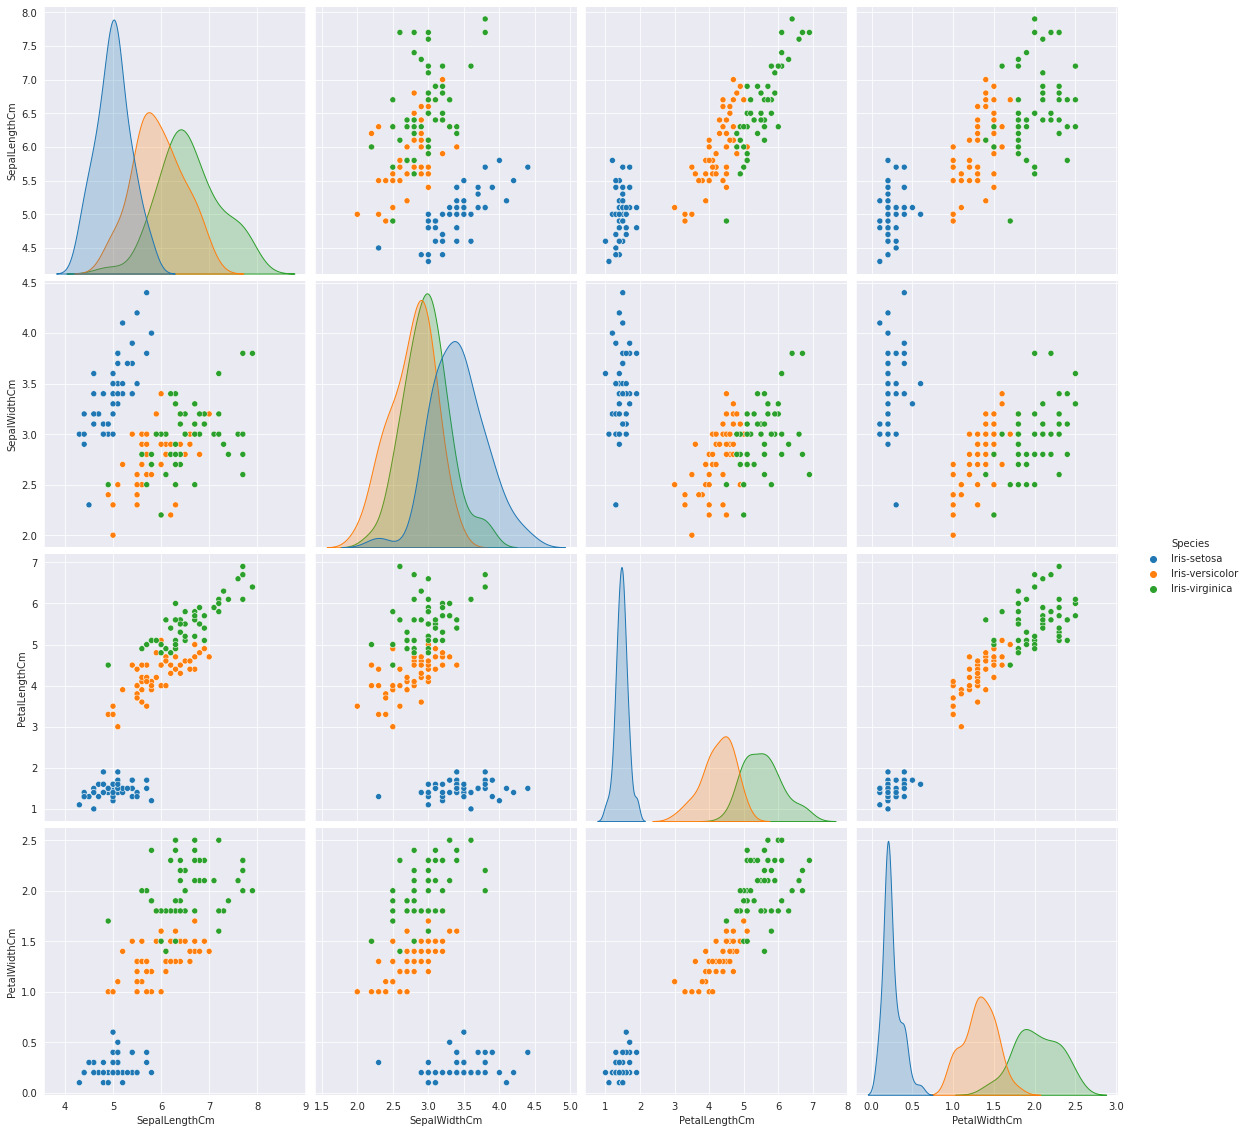

In [11]:
sns.set_style("darkgrid");
sns.pairplot(df, hue = "Species", height = 4)
plt.show()

**Visualizing the correlation between columns of the dataset**

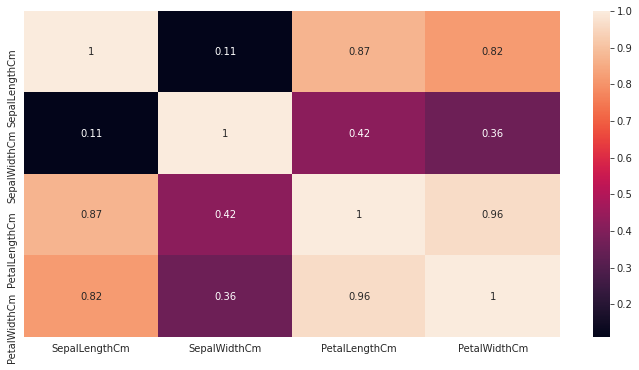

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(abs(df.corr()), annot = True)
plt.show()

**Due to unsupervised learning, we need to remove the species column**

In [20]:
df_temp = df
df_temp = df_temp.drop(['Species'], axis = 1)

**Finding the outliers among the dataset using boxplot**

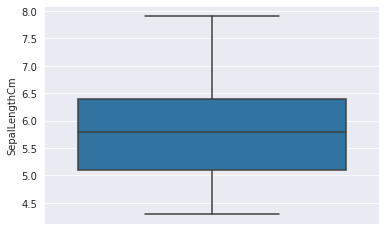

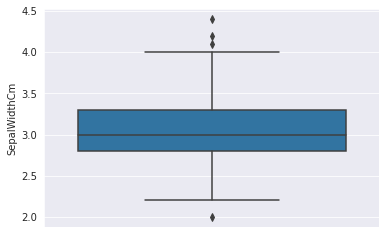

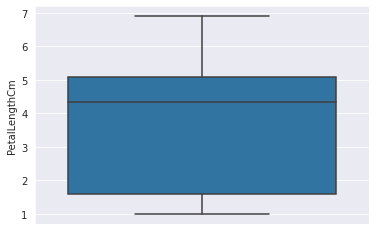

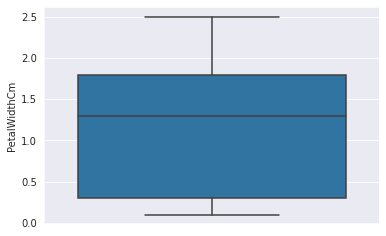

In [21]:
for i in df_temp:
  sns.boxplot(y=df_temp[i])
  plt.show()

**From the above plots, we can see SepalWidth column having outliers**

**For the proposed solution, I have used Inter-Quartile Range technique to remove outliers**

In [14]:
#Importing necessary libraries for outlier removal
from scipy.stats import iqr
%matplotlib inline

**Defining function for finding the upper range and lower range**

In [22]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

**Applying the user-defined function to the SepalWidth column to find the upper and lower bound**

In [27]:
lower_r, upper_r = outlier_treatment(df_temp.SepalWidthCm)

In [28]:
print(lower_r)

2.05


In [29]:
print(upper_r)

4.05


**Displaying the outliers** 

In [30]:
df_temp[(df_temp.SepalWidthCm > upper_r) | (df_temp.SepalWidthCm < lower_r)]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
60,5.0,2.0,3.5,1.0


**Removing the outliers from the dataset**

In [31]:
df_temp.drop(df_temp[(df_temp.SepalWidthCm > upper_r) | (df_temp.SepalWidthCm < lower_r)].index, inplace=True)

In [32]:
df_temp

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


**Again plotting the box-plot to check whether any outliers are still present**

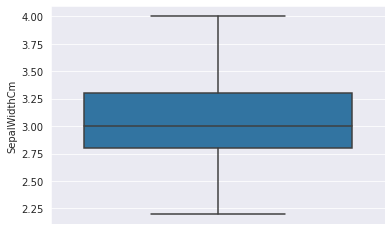

In [33]:
sns.boxplot(y=df_temp['SepalWidthCm'])
plt.show()

**I have approached the problem using K-Means Clustering** 

In [34]:
from sklearn.cluster import KMeans

**Finding the appropriate number of cluster using Elbow Method**

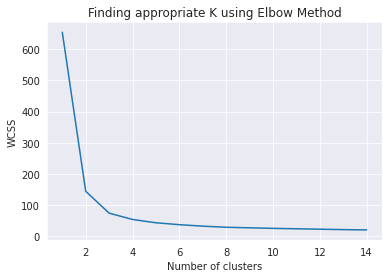

In [35]:
x = df_temp.iloc[:, [0,1,2,3]].values
wcss = []

for i in range(1, 15):
  km_cluster = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 0)
  km_cluster.fit(x)
  wcss.append(km_cluster.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('Finding appropriate K using Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

**From the plot, we can vizualizie that k=3 would work fine for the problem**

In [46]:
km_cluster = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 0)
y_km = km_cluster.fit_predict(x)

In [47]:
print(y_km)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2 2 2 1 1
 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2 2 1]


**Vizualizing the predictions using 2D & 3D Scatter plots**

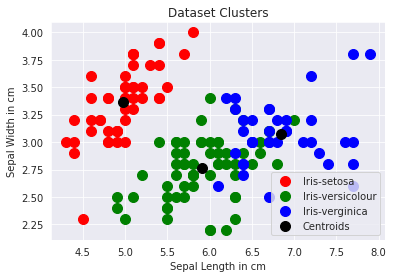

In [48]:
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], s = 100, c = 'blue', label = 'Iris-verginica')

#Plotting the centroids of the clusters
plt.scatter(km_cluster.cluster_centers_[:, 0], km_cluster.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.title("Dataset Clusters")
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')
plt.legend()
plt.show()

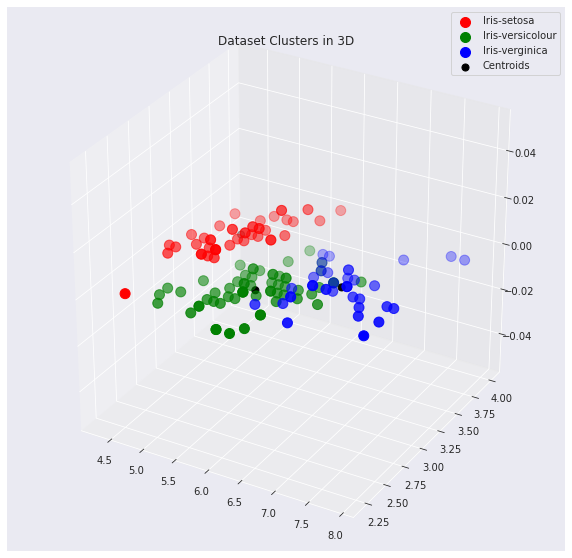

In [49]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1], s = 100, c = 'blue', label = 'Iris-verginica')

#Plotting the centroids of the clusters
plt.scatter(km_cluster.cluster_centers_[:, 0], km_cluster.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroids')
plt.title("Dataset Clusters in 3D")
plt.legend()
plt.show()

**Labeling the predictions**

In [59]:
#considering 0 Corresponds to 'Iris-Virginica'
#1 to 'Iris-Setosa'
#2 to 'Iris-Versicolour'
y_km = np.where(y_km=='0', 'Iris-setosa', y_km)
y_km = np.where(y_km=='1', 'Iris-versicolour', y_km)
y_km = np.where(y_km=='2', 'Iris-virginica', y_km)

**Adding the labeled predictions to the dataset**

In [60]:
df_clusters = df_temp.copy()
df_clusters["Species_cluster"] = y_km


**Vizualizing the head and tail of the newly created data**

In [61]:
df_clusters.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_cluster
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:
df_clusters.tail(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_cluster
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-versicolour
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-versicolour


**Vizualizing the data using Violin plot and Pair plot**

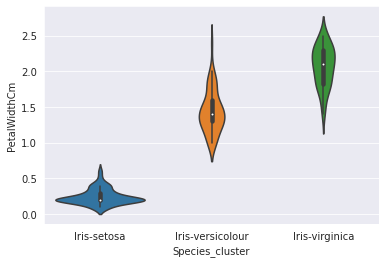

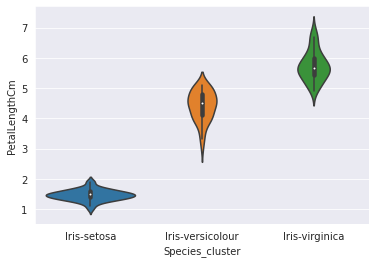

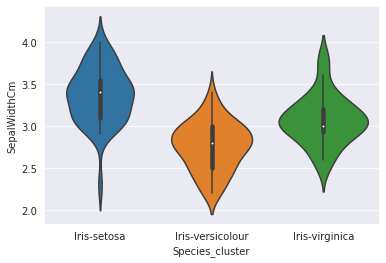

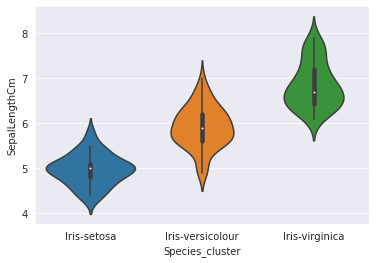

In [63]:
sns.violinplot(x="Species_cluster",y="PetalWidthCm",data=df_clusters)
plt.show()
sns.violinplot(x="Species_cluster",y="PetalLengthCm",data=df_clusters)
plt.show()
sns.violinplot(x="Species_cluster",y="SepalWidthCm",data=df_clusters)
plt.show()
sns.violinplot(x="Species_cluster",y="SepalLengthCm",data=df_clusters)
plt.show()


**Inferences from the Violin Plot**


1.   Iris Setosa seems to have smaller petal-length and petal-width comared to other two.
2.   Iris-Versicolour seems to have average dimensions among the 3 species.
3. Sepal Width of the 3 species are approximately similar.



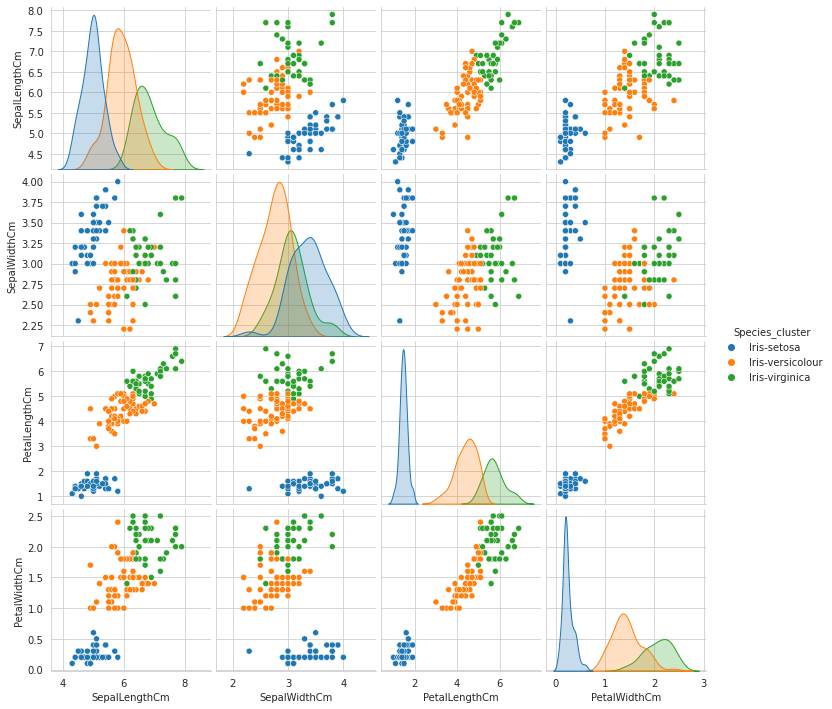

In [64]:
sns.set_style('whitegrid')
sns.pairplot(df_clusters,hue = 'Species_cluster');

**Inferences from the Pair Plot**


1. Petal Length and Petal Width are having a possitive correlation as suggested by the plot.
2. Sepal Length and Petal Length are having a positive correlation as suggested by the plot.
